개념 정리는 코드 필사 중간에 있습니다!

In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O(e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment=None
#default='warn'

In [3]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

In [51]:
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

In [5]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [181]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


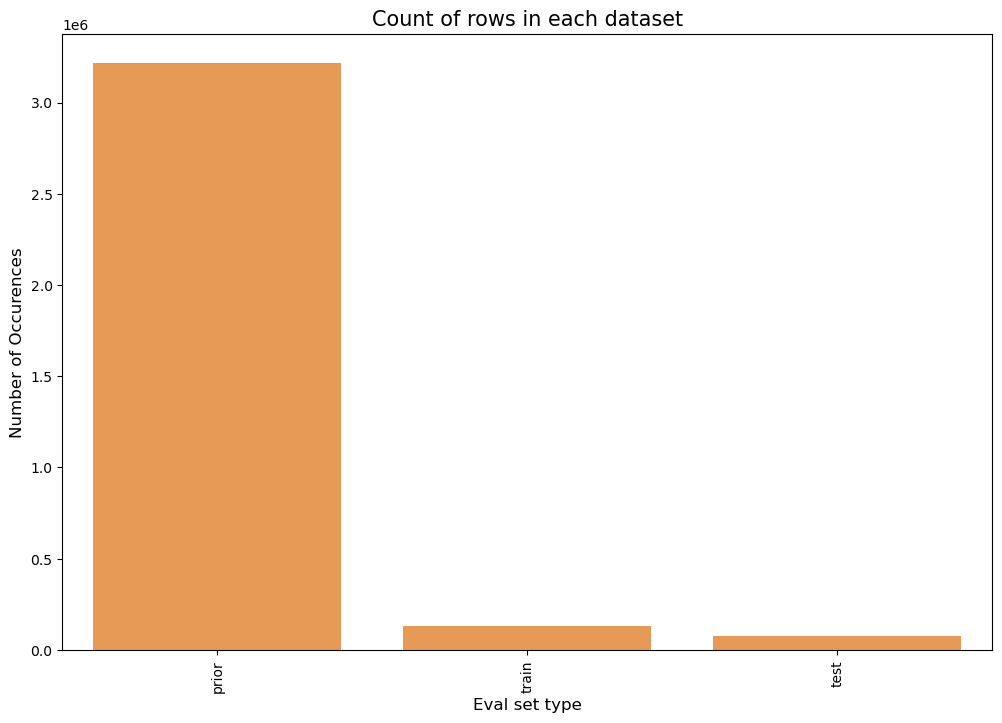

In [7]:
cnt_srs=orders_df.eval_set.value_counts()
# value.counts()를 통해서 각각의 값이 나온 횟수를 셀 수 있다.

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [8]:
def get_unique_count(x): 
    return len(np.unique(x))

cnt_srs=orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

전체에서는 206209 고객이 있다. train set에서는 131209명, 나머지 75000은 test set에 있다.

reset_index는 설정 인덱스를 제거하고 기본 인덱스(0,1,2, ... , n)으로 변경함

C:\Users\USER\AppData\Local\Temp\ipykernel_21464\1409014484.py:1: FutureWarning: The provided callable <function max at 0x000002151729D280> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs=orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()


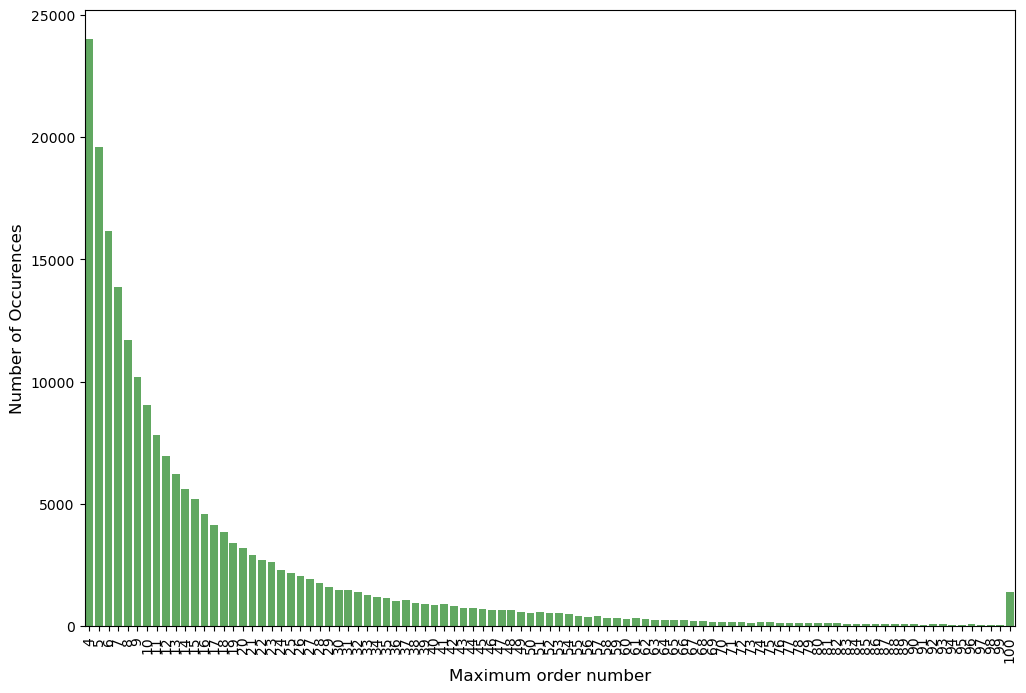

In [9]:
cnt_srs=orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs=cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Maximum order number',fontsize=12)
plt.xticks(rotation=90)
plt.show()

 4개 미만의 orders은 없으며 데이터 페이지에 나와 있는 대로 최대 100개로 제한된다.

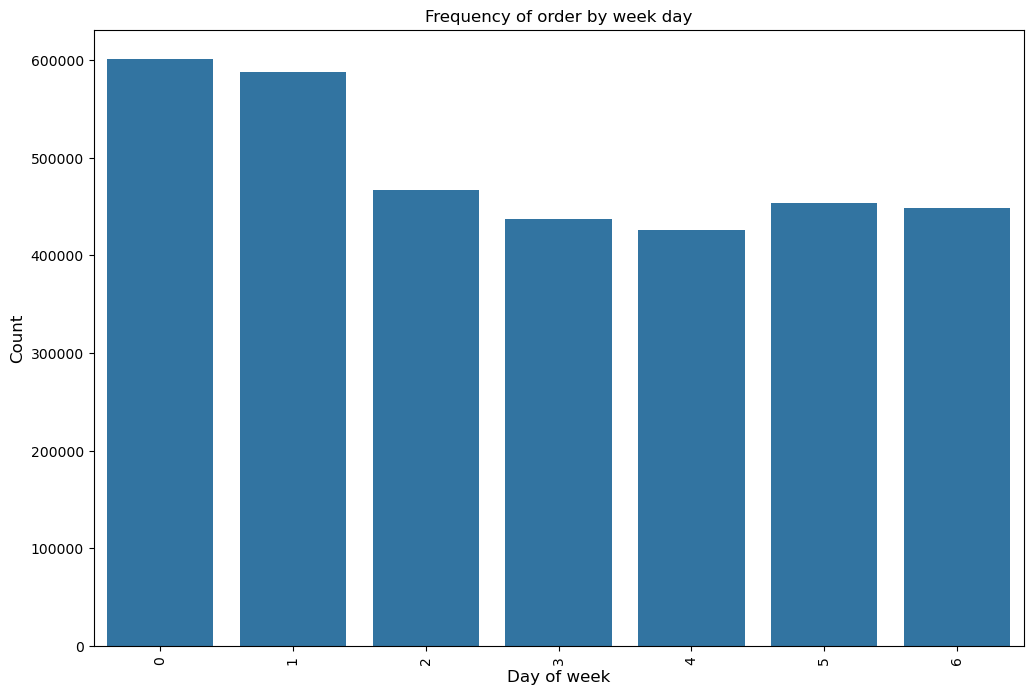

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=orders_df, color=color[0])
plt.ylabel("Count", fontsize=12)
plt.xlabel("Day of week", fontsize=12)
plt.xticks(rotation=90)
plt.title("Frequency of order by week day")
plt.show()

위 그래프를 통해서 order이 토요일과 일요일에 높은 것처럼 보이고, 수요일동안에는 orders가 낮다.

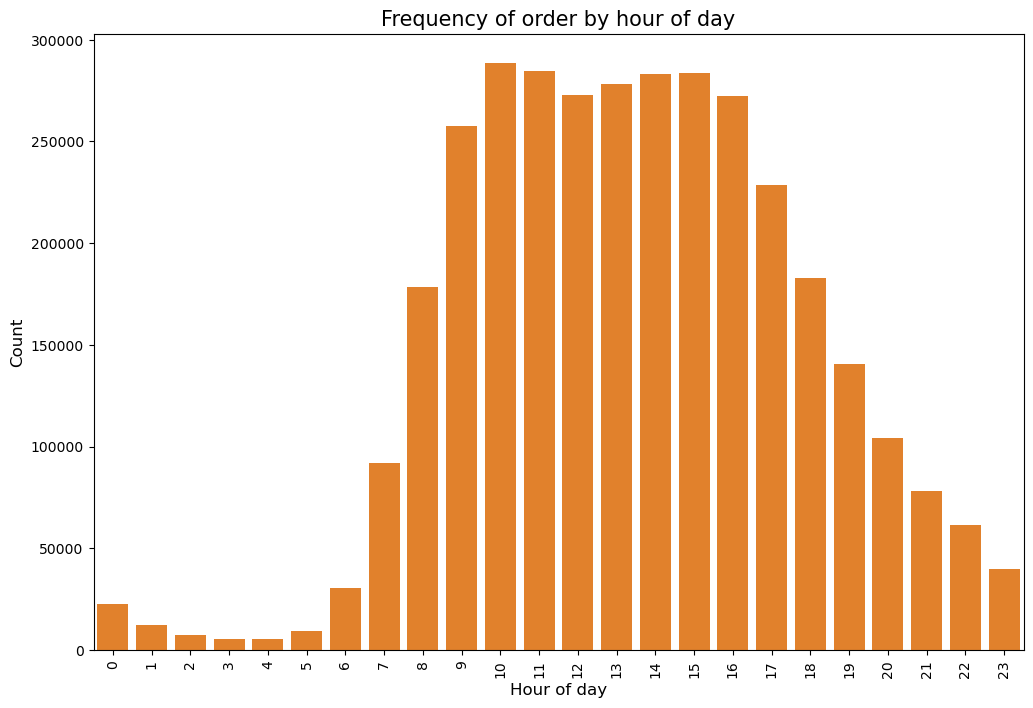

In [11]:
plt.figure(figsize=(12,8))

sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel("Count", fontsize=12)
plt.xlabel("Hour of day", fontsize=12)
plt.xticks(rotation=90)
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

위 그래프를 통해서 대부분의 orders는 낮 시간동안 만들어진다는 것을 알 수 있다.

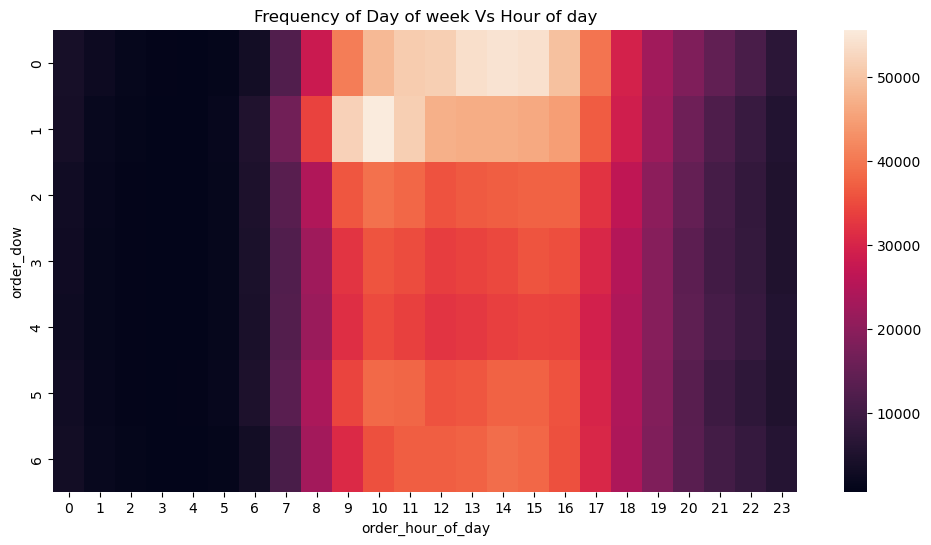

In [182]:
grouped_df=orders_df.groupby(["order_dow","order_hour_of_day"])["order_number"].aggregate("count").reset_index()

grouped_df=grouped_df.pivot(index='order_dow', columns='order_hour_of_day',values='order_number')

# 데이터프레임.pivot(index=인덱스로 설정한 칼럼, columns=칼럼으로 설정한 칼럼, values=데이터를 구성하는 값)

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

위 그래프를 통해서 토요일 저녁과 일요일 아침이 주문이 많이 들어오는 것처럼 보임

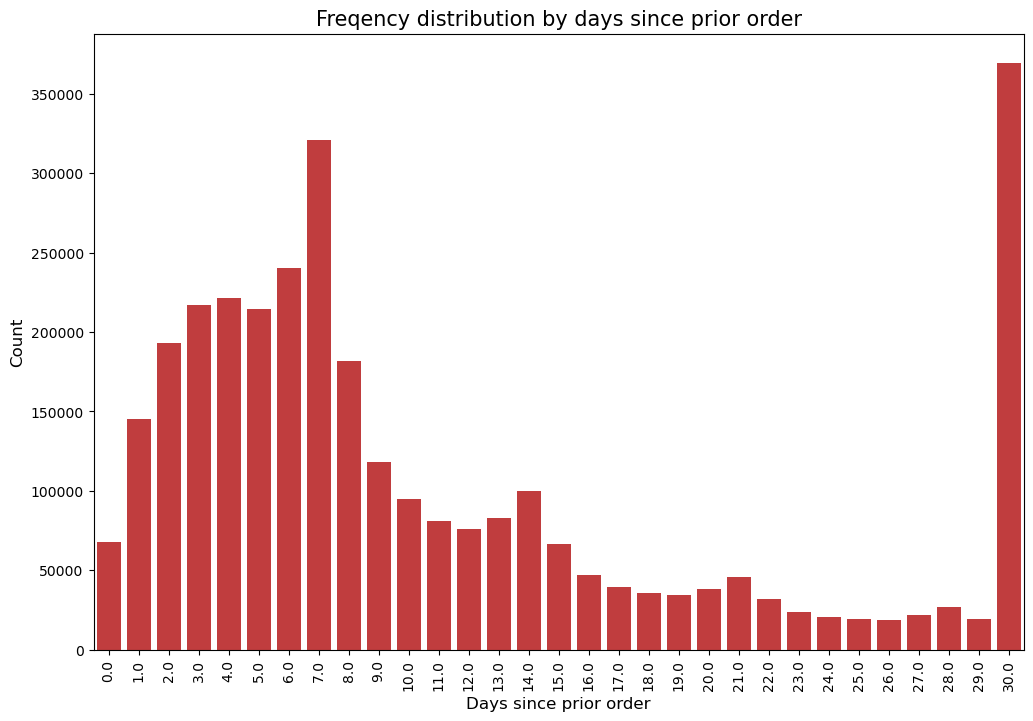

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order",data=orders_df, color=color[3])
plt.ylabel("Count",fontsize=12)
plt.xlabel("Days since prior order",fontsize=12)
plt.xticks(rotation=90)
plt.title("Freqency distribution by days since prior order",fontsize=15)
plt.show()

위 그래프를 통해서 고객들이 일주일에 한번 혹은 한달에 한번 order하는 것을 볼 수 있다.

14,21,28일에도 작은 peaks가 있는 것을 볼 수 있다.

In [14]:
#percnetage of re-orders in prior set#
order_products_prior_df.reordered.sum()/order_products_prior_df.shape[0]

0.5896974667922161

In [15]:
#percnetage of re-orders in train set#
order_products_train_df.reordered.sum()/order_products_train_df.shape[0]

0.5985944127509629

약 주문한 상품의 59%는 다시 주문하는 상품이라는 것을 알 수 있다.

In [16]:
grouped_df=order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()

grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1
grouped_df.reordered.value_counts()/grouped_df.shape[0]

C:\Users\USER\AppData\Local\Temp\ipykernel_21464\1624318900.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1


reordered
1    0.879151
0    0.120849
Name: count, dtype: float64

In [17]:
grouped_df=order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()

grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1
grouped_df.reordered.value_counts()/grouped_df.shape[0]

C:\Users\USER\AppData\Local\Temp\ipykernel_21464\3594259027.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1


reordered
1    0.93444
0    0.06556
Name: count, dtype: float64

여기에서 불린 인덱싱은 iloc에서는 안되고 loc에서만 가능하다.

prior set에서는 12%가 re-ordered items가 없지만, train set에서는 6%가 없다.


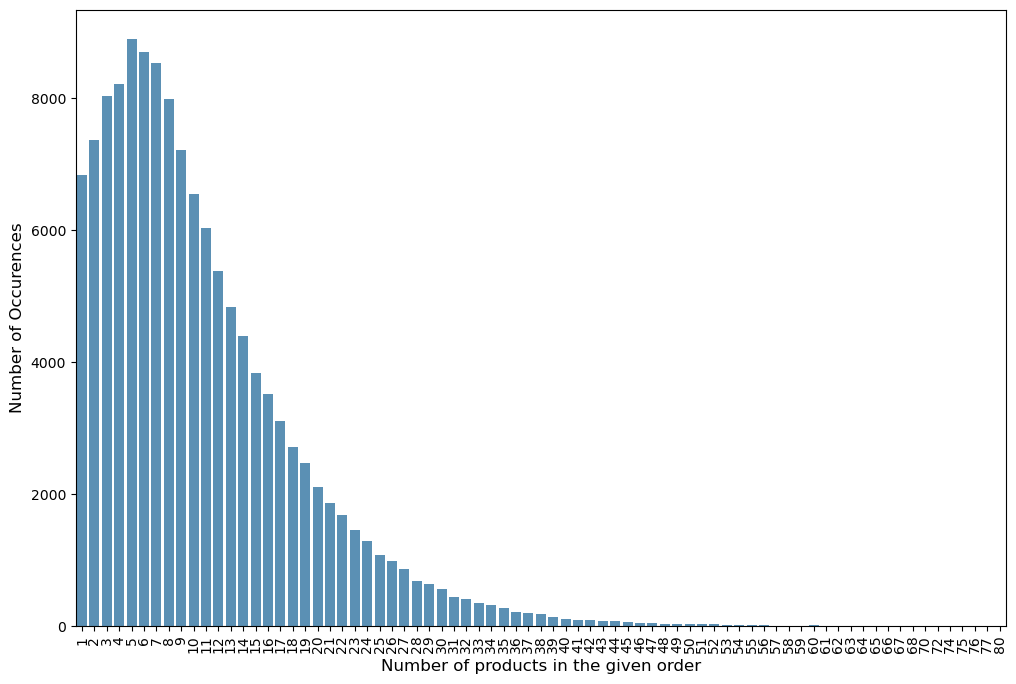

In [19]:
grouped_df=order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
#ordered id별로 add_to_cart_order의 최댓값으로 표시해둠
cnt_srs=grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs, alpha=0.8)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation=90)
plt.show()

오른쪽 꼬리를 가진 분포이며, 최대값은 5일 때이다.

In [20]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [21]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [22]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [23]:
import pandas as pd

order_products_prior_df = pd.read_csv("order_products__prior.csv")

order_products_prior_df=pd.merge(order_products_prior_df, products_df, on='product_id', how='left')

order_products_prior_df=pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')

order_products_prior_df=pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')

order_products_prior_df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


* pd.merge(left, right, on='기준열', how='병합시 기준이 될 인덱스를 정하는 방식')을 나타냄.


* left=기존객체, right=병합할 객체, inner=두 객체의 인덱스의 교집합.

* 합쳐지는 것은 같은데 어떤것을 기준으로 하냐에 따라서 달라짐 -> 그것을 how를 통해서 정함!

In [24]:
cnt_srs=order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns=['product_name','frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


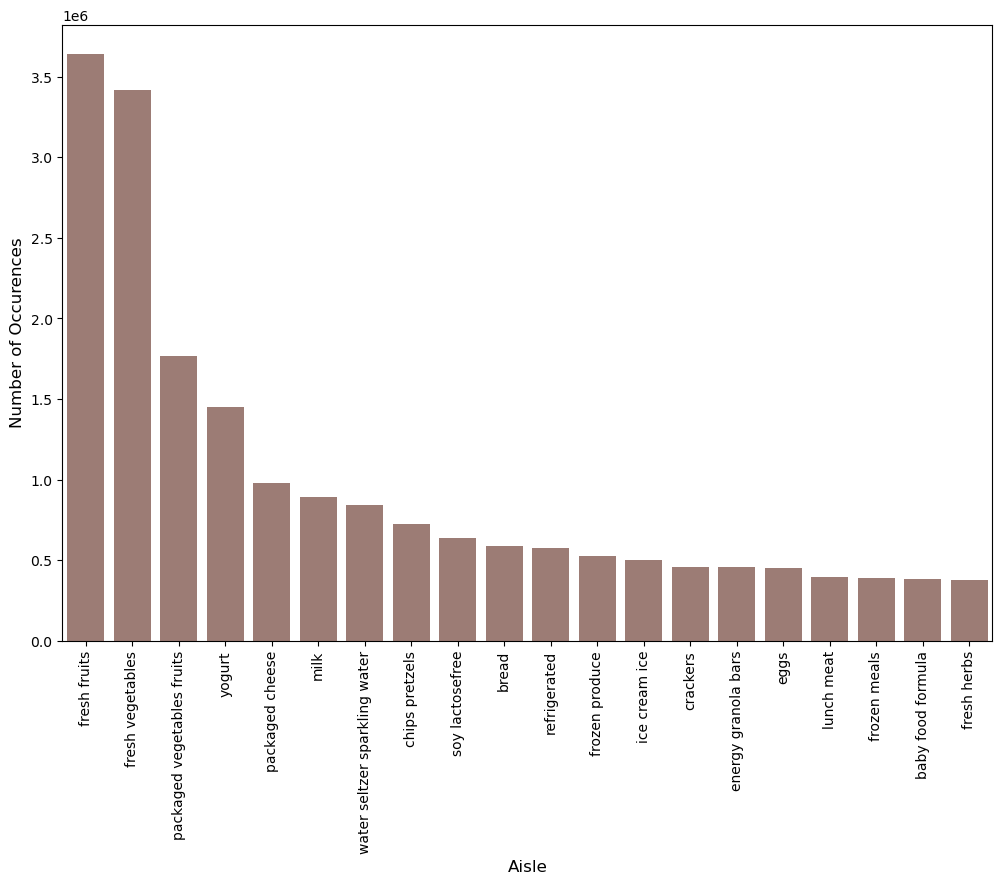

In [25]:
cnt_srs=order_products_prior_df['aisle'].value_counts().head(20)

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs,alpha=0.8,color=color[5])
plt.ylabel("Number of Occurences", fontsize=12)
plt.xlabel("Aisle", fontsize=12)
plt.xticks(rotation=90)
plt.show()

* freshfuits와 fresh vegetables가 높은 occurence를 보이고 있다.

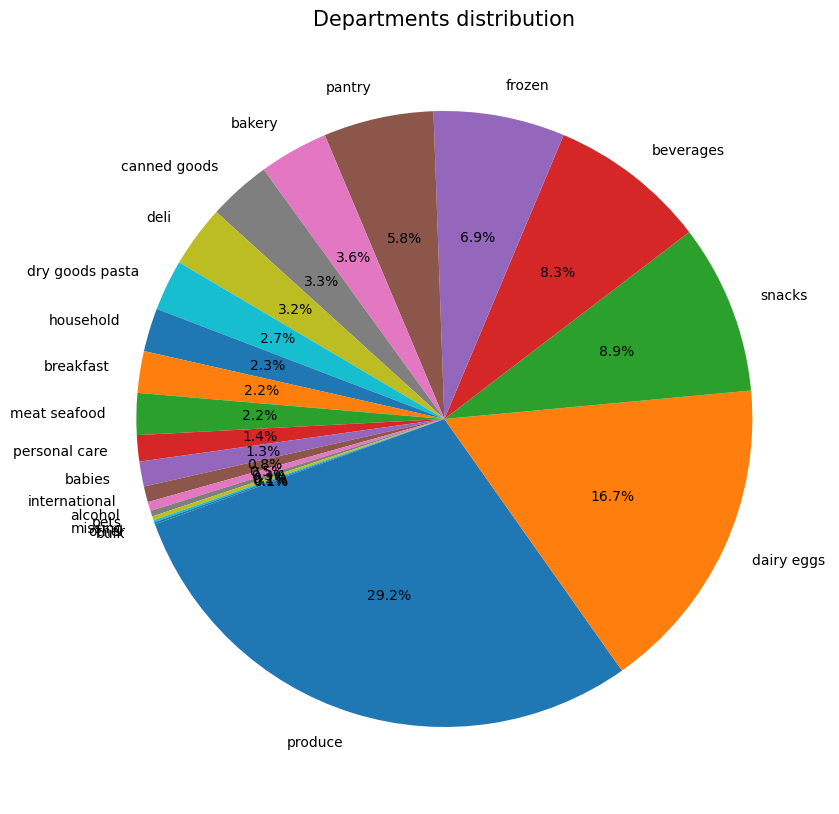

In [26]:
plt.figure(figsize=(10,10))
temp_series=order_products_prior_df['department'].value_counts()
labels=np.array(temp_series.index)
sizes=np.array(temp_series/temp_series.sum()*100)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

* 파이차트를 그릴때, x에는 수치데이터, labels=범주데이터,
*  autopct는 부채꼴 안에 표시될 숫자의 형식 지정 %.1f%%는 소수 1자리까지 표시하고 뒤에 %표시를 말함.
*  startangle은 원그래프의 첫 데이터 시작 위치를 설정함

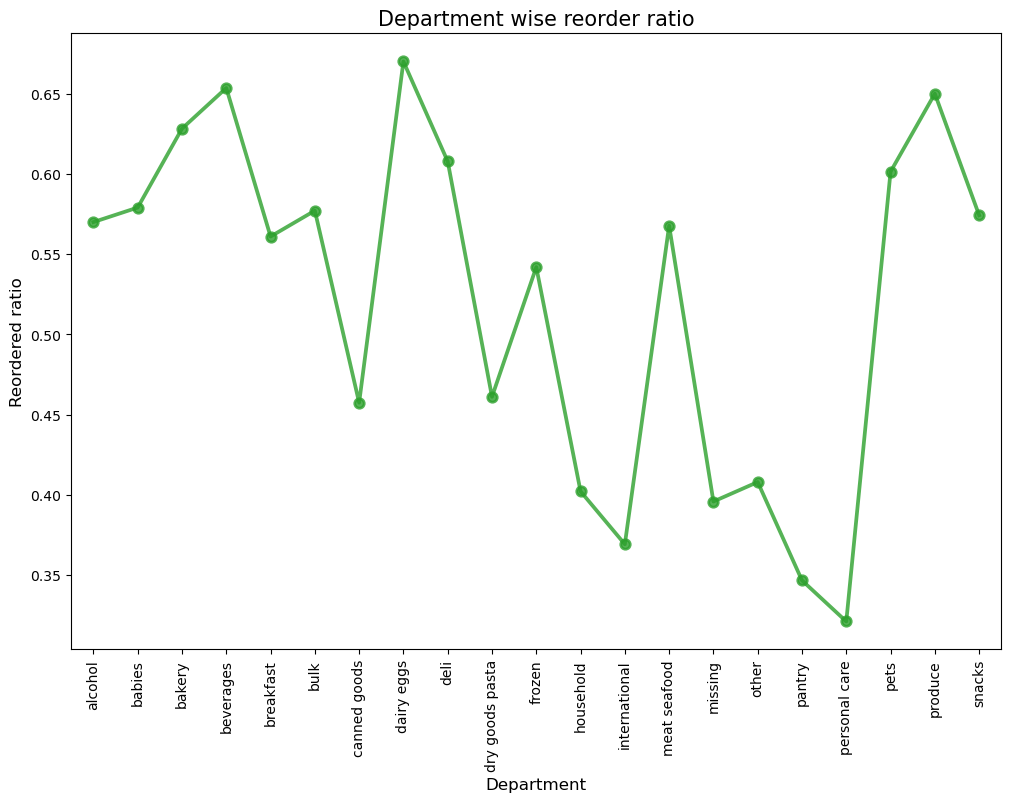

In [27]:
grouped_df =order_products_prior_df.groupby(['department'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reordered ratio',fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation=90)
plt.show()

* sns.point plot의 인자로는 alpha=투명도도 있고, hue, palette:스타일 설정, errorbar=오차막대 설정도 가능한다.

In [28]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


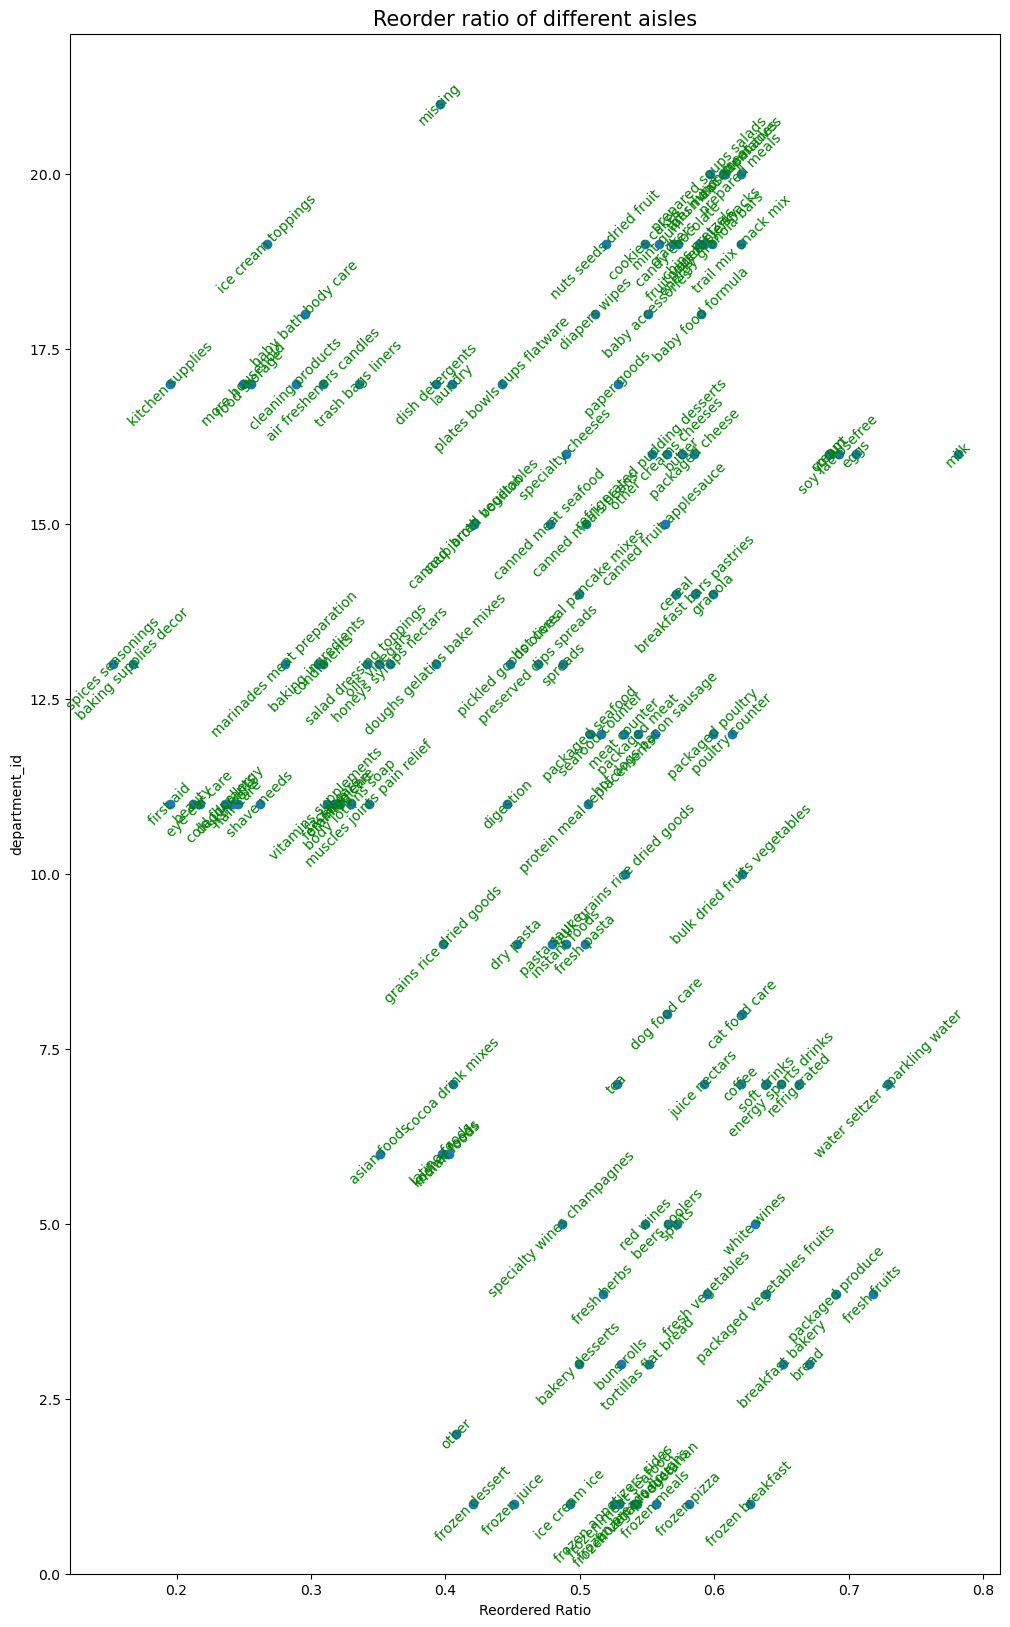

In [29]:
grouped_df =order_products_prior_df.groupby(['department_id','aisle'])['reordered'].aggregate('mean').reset_index()

fig,ax= plt.subplots(figsize=(12,20))
ax.scatter(grouped_df['reordered'].values,grouped_df['department_id'].values)

for i,txt in enumerate(grouped_df['aisle'].values):
    ax.annotate(txt, (grouped_df['reordered'].values[i],grouped_df['department_id'].values[i] ),
               rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reordered Ratio')
plt.ylabel('department_id')
plt.title('Reorder ratio of different aisles', fontsize=15)
plt.show()

* ax.annotate에서 첫번째 매개변수에 그래프에 나타낼 문자열을 지정하고,
* 두번째 매개변수에 문자열이 나타날 x,y좌표를 튜플로 지정한다.
* 이때 인자 ha는 텍스트 좌우 정렬을 의미하고, va는 텍스트의 상하 정렬을 의미한다.

C:\Users\USER\AppData\Local\Temp\ipykernel_21464\622706305.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  order_products_prior_df['add_to_cart_order_mod'].iloc[order_products_prior_df['add_to_cart_order_mod']>70]=70


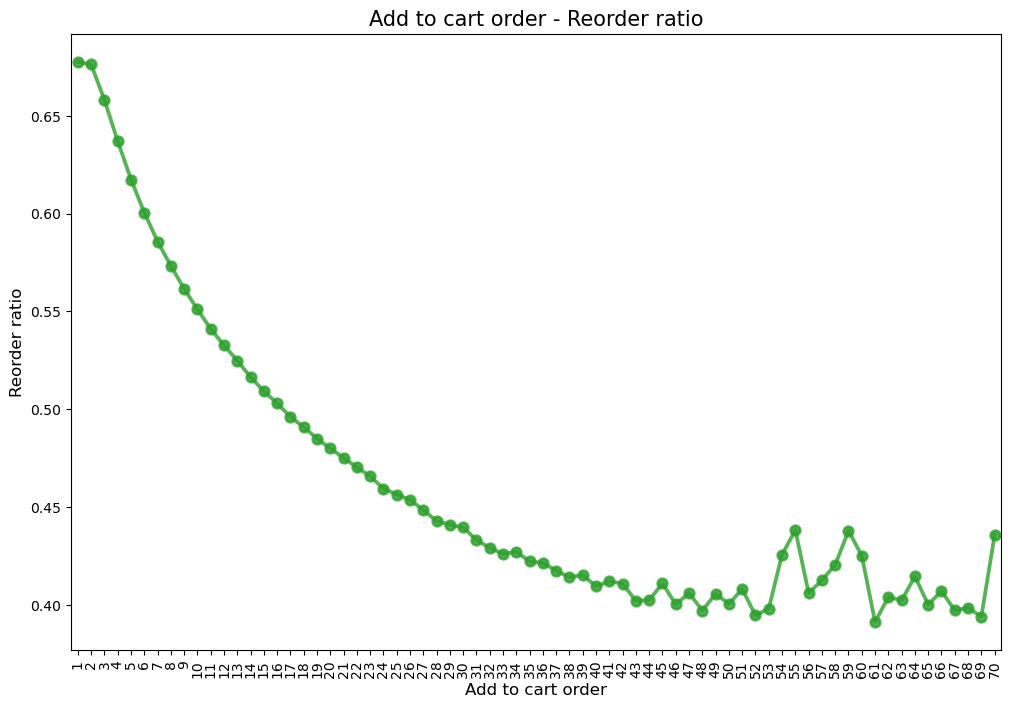

In [39]:
order_products_prior_df['add_to_cart_order_mod']=order_products_prior_df['add_to_cart_order'].copy()
order_products_prior_df['add_to_cart_order_mod'].iloc[order_products_prior_df['add_to_cart_order_mod']>70]=70
grouped_df=order_products_prior_df.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x= grouped_df['add_to_cart_order_mod'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order',fontsize=12)
plt.title('Add to cart order - Reorder ratio',fontsize=15)
plt.xticks(rotation=90)
plt.show()

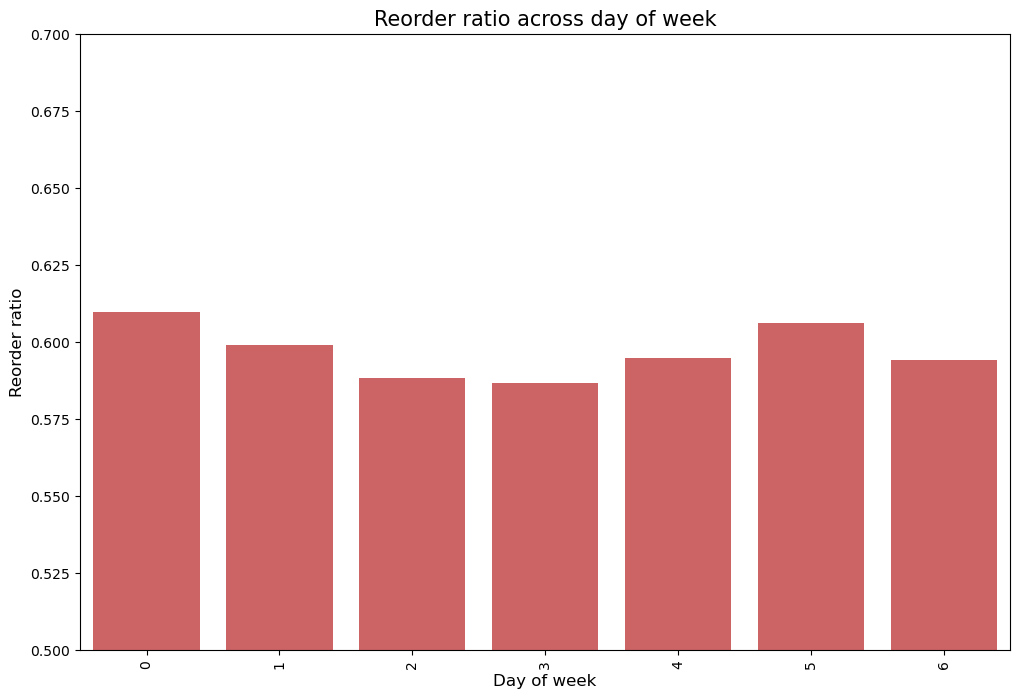

In [52]:
order_products_train_df=pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df=order_products_train_df.groupby(['order_dow'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_dow'].values,y=grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Reorder ratio', fontsize=12)
plt.title('Reorder ratio across day of week', fontsize=15)
plt.xticks(rotation=90)
plt.ylim(0.5,0.7)
plt.show()

In [50]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


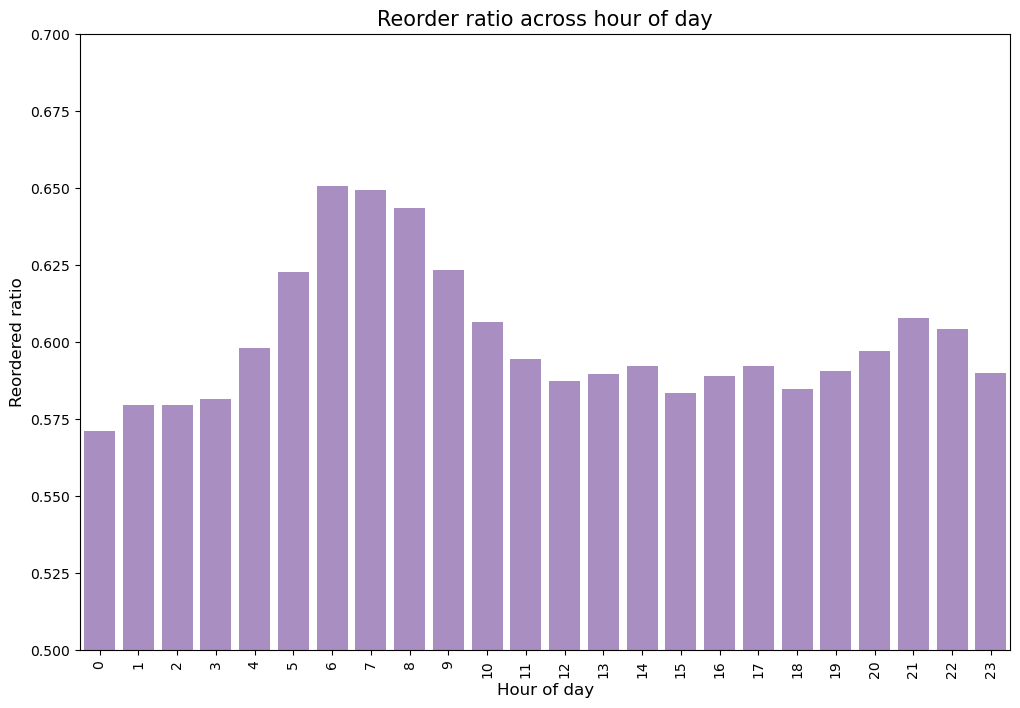

In [54]:
grouped_df=order_products_train_df.groupby(['order_hour_of_day'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_hour_of_day'], y=grouped_df['reordered'], alpha=0.8, color=color[4])
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Reordered ratio', fontsize=12)
plt.title('Reorder ratio across hour of day', fontsize=15)
plt.xticks(rotation=90)
plt.ylim(0.5,0.7)
plt.show()

In [58]:
grouped_df=order_products_train_df.groupby(['order_dow','order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
grouped_df

,order_dow,order_hour_of_day,reordered
0,0,0,0.577806
1,0,1,0.587189
2,0,2,0.593341
3,0,3,0.553435
4,0,4,0.599455
...,...,...,...
163,6,19,0.577114
164,6,20,0.604114
165,6,21,0.618027
166,6,22,0.643312


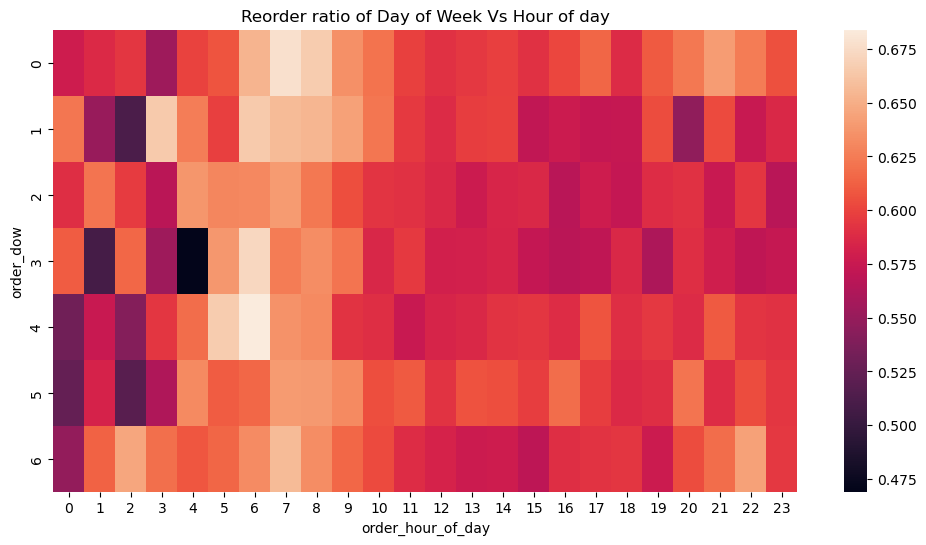

In [60]:
grouped_df=order_products_train_df.groupby(['order_dow','order_hour_of_day'])['reordered'].aggregate('mean').reset_index()

grouped_df=grouped_df.pivot(index='order_dow',columns='order_hour_of_day',values='reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title('Reorder ratio of Day of Week Vs Hour of day')
plt.show()

## [새로운 전처리/시각화]

In [134]:
new_data=pd.merge(products_df,aisles_df, on='aisle_id',how='left')

In [135]:
new_data

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,2,All-Seasons Salt,104,13,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care


In [171]:
counting=new_data['aisle'].value_counts()

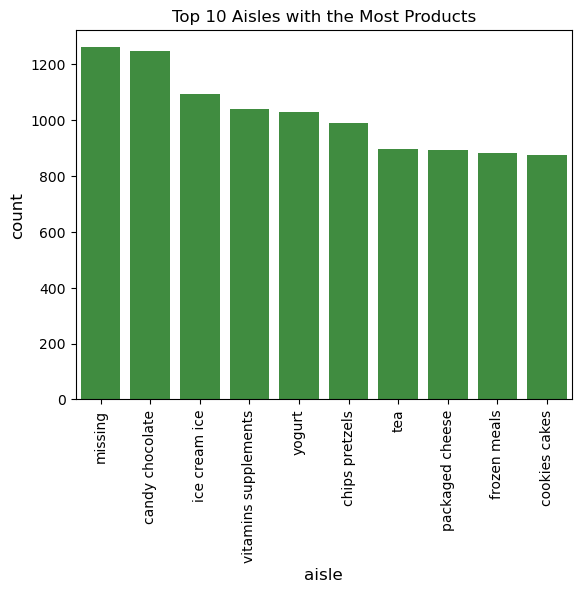

In [180]:
sns.barplot(x=counting.index[:10],y=counting.values[:10],alpha=0.8, color='green')
plt.xlabel('aisle',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('Top 10 Aisles with the Most Products')
plt.xticks(rotation=90)
plt.show()

* products_df자료와 aisle_df자료를 products_df의 aisle_id를 기준으로 merge한다. 
-> 그러면 상품들이 많이 속하고 있는 상품 소분류를 알 수 있음.
* missing을 제외하고 상품들이 많이 속해 있는 상품 소분류가 candy chocolate와 ice cream ice라는 것을 위 시각화를 통해서 알 수 있다.